### Some comments

1) Anxiety : range from 0 to 21, Measure : GAD-7
2) Self-esteem : range 0 to 30, Measure: Rosenberg Self Esteem Scale
3) Mental Health History : 0 if no mental health history, 1 if mental health history
4) Depression : range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
5) Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.
6) Blood pressure: range 1 to 3 (There was no direct explanation for this one, I assume 1 is low, 2 is normal, 3 is high)
7) Stress level: range 0 to 2 (Again no explanation, I assume, 0 low level/absent, 1 medium level, 2 high level)
8) Generally lower score is better, but for others it is hard to decide. For example sleep quality, we can have an educated guess if we do some data analysis.
However, these other features could also be given scientific measures. eg. blood pressure.


Explanation to depression levels (PHQ-9):

1-4 suggests minimal depression
5-9 suggests mild depression
10-14 suggests moderate depression
15-19 suggests moderately severe depression
A score of 20-27 suggests severe depression

Kagglede descripttiondaki suallardan reference elemek olar

4 different categories simple descriptive statistics for each of them

Psychological Factors => 'anxiety_level', 'self_esteem', 'mental_health_history', 'depression'

Physiological Factors => 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'

Environmental Factors => 'noise_level', 'living_conditions', 'safety', 'basic_needs'

Academic Factors => 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'

Social Factor => 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying'

In order to decide which factor influences the most to the stress level, first with statistical methods:

Corellation between stress level and other columns

Regression analysis


Stress Level is the dependent variable. Other cols are the independent variables.

independent_vars = ['Anxiety_Level', 'Self_Esteem', ....]  #cols
Add a constant for the intercept term
df['constant'] = 1

model = sm.OLS(df['stress_level'], df[independent_vars + ['constant']])
results = model.fit()
print(results.summary())

The `results.summary()` will provide detailed information about the regression analysis, including coefficients, p-values, R-squared value (a measure of how well the factors explain the variability of stress levels), and more.

 szßs0e4rt58'stress_level' is the target column, and other columns are factors influencing stress levels

X = df.drop('stress_level', axis=1)  # Features
y = df['stress_level']  # Target variable

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance'])

feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('StressLevelDataset.csv')

In [4]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [6]:
target = 'stress_level'

In [7]:
df[target].max()

2

In [8]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [9]:
psych_factors = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression']
physio_factors = ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem']
env_factors = ['noise_level', 'living_conditions', 'safety', 'basic_needs']
academic_factors = ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns']
social_factors = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']

<Axes: >

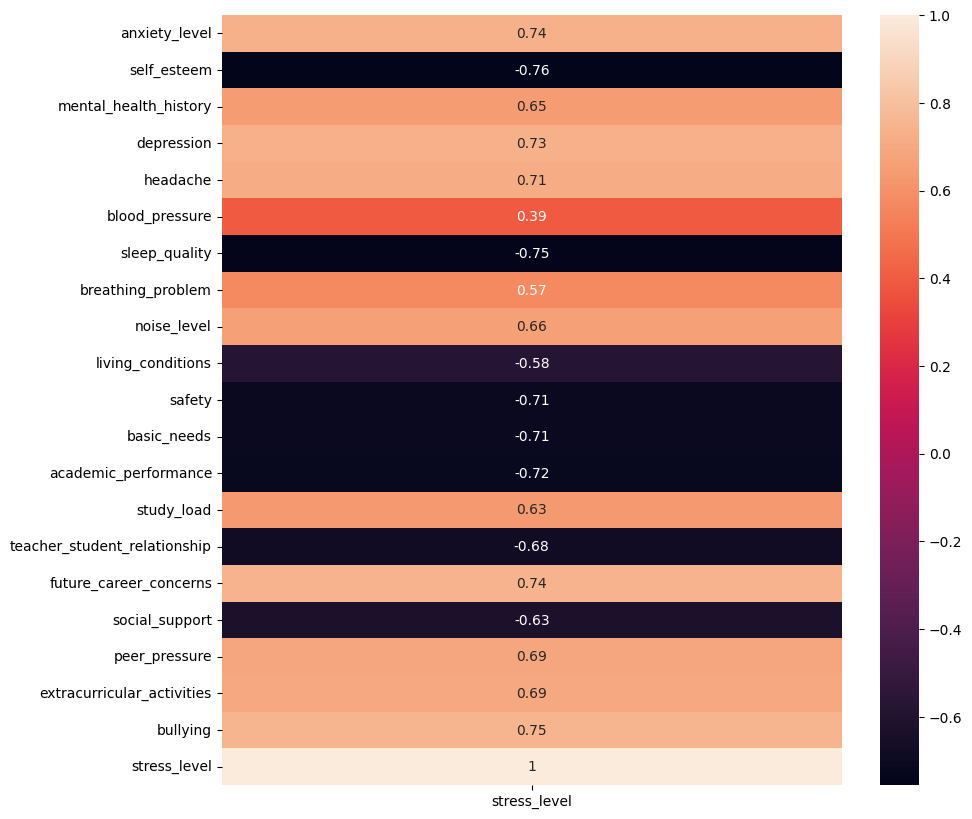

In [10]:
corr = df.corr()[[target]]
plt.figure(figsize = (10,10))
sns.heatmap(corr,  annot=True)

In [11]:
px.histogram(df,x=target, color = target).update_layout(bargap=0.2)

In [12]:
px.histogram(df,x='depression',color = target, title = 'Stress Level Dependence on Depression').update_layout(bargap=0.2 )

In [13]:
px.histogram(df,x='social_support',color = target, title = 'Stress Level Dependence on Depression').update_layout(bargap=0.2 )

In [ ]:
# Too much time spent on activities, thats why positive correlation
px.histogram(df,x='extracurricular_activities', color = target, title = 'Stress Level Dependence on Depression').update_layout(bargap=0.2 )

In [14]:
df.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(target,axis=1), df[target], test_size=.2)

In [16]:
# Reinforcement Learning
# boosting - bagging
# LGBM, XGB - RandomForest

# Extreme Gradient Boost
model = XGBClassifier()

In [ ]:
#  MODELS

# decision tree
# random forest
# LGBM
# KMEANS
#

In [17]:
# fit model
model.fit(X_train, y_train)
# make predictions
preds = model.predict(X_test)

In [ ]:
'''
----------  PREDICTION    acc=83.(3)
----------  A     B
A - 100  -> 80 / 20
B - 50   -> 5  / 45

150 PREDICTION

'''


'\n----------  PREDICTION    acc=83.(3)\n----------  A     B\nA - 100  -> 80 / 20\nB - 50   -> 5  / 45\n\n150 PREDICTION\n\n'

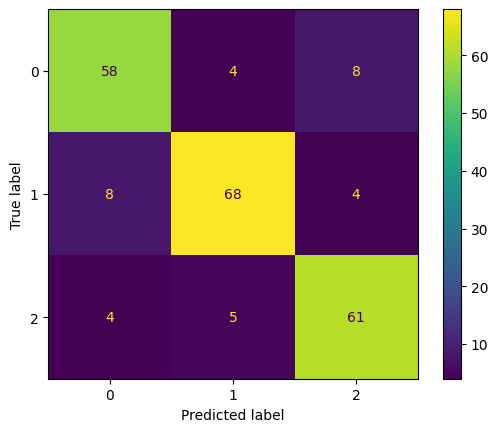

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, preds))
disp.plot()

In [20]:
explainer = shap.Explainer(model, X_train)

c:\Users\TeymurRzali\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning:

[09:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.



In [21]:
shap_values = explainer(X_train)#, check_additivity=False)

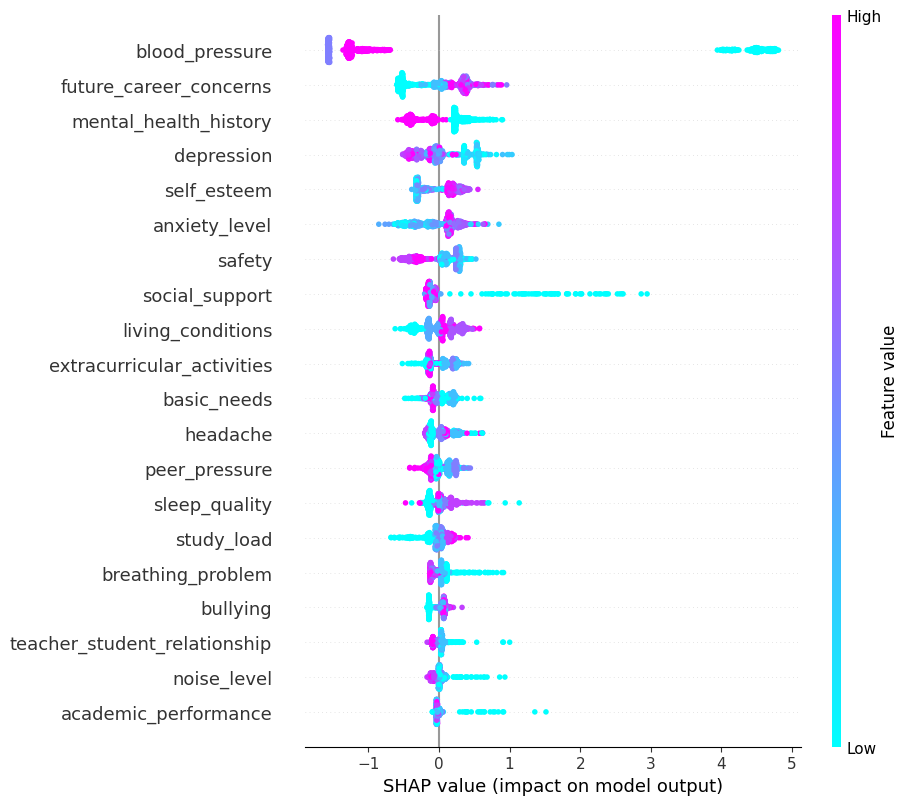

In [22]:
shap.plots.beeswarm(shap_values[:,:,1],max_display=35 , color=plt.get_cmap("cool"))
# shap.plots.beeswarm(shap_values,max_display=35 , color=plt.get_cmap("cool"))

<Axes: >

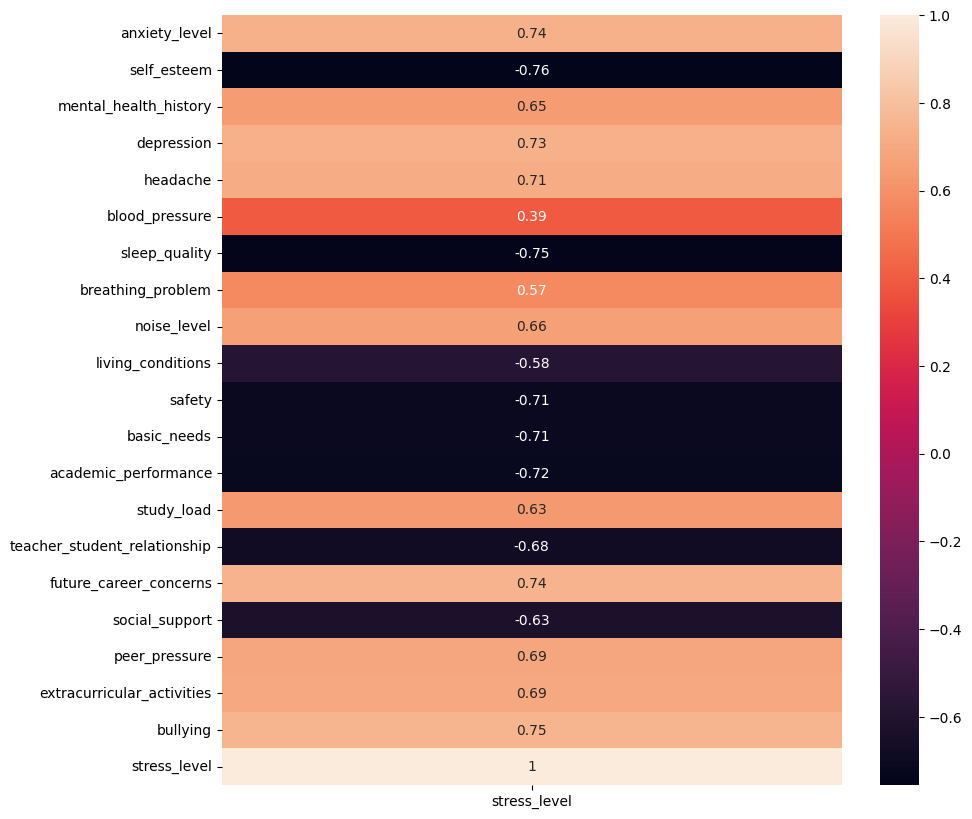

In [23]:
corr = df.corr()[[target]]
plt.figure(figsize = (10,10))
sns.heatmap(corr,  annot=True)

In [24]:
import statsmodels.api as sm

# Define independent variables and add a constant for the intercept term
independent_vars = list(df.columns)[:-2]  # Add other columns as needed
df['constant'] = 1

# Create the OLS (Ordinary Least Squares) model
model = sm.OLS(df['stress_level'], df[independent_vars + ['constant']])

# Fit the model to the data
results = model.fit()

# Display the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:10:03   Log-Likelihood:                -478.35
No. Observations:                1100   AIC:                             996.7
Df Residuals:                    1080   BIC:                             1097.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
anxiety_level   